In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LeakyReLU
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from scikeras.wrappers import KerasClassifier 
import random
from tensorflow.keras import backend
#random.seed(1)
#np.random.seed(1) 
#tf.random.set_seed(1)
warnings.filterwarnings("ignore")
from keras import optimizers
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
signal=pd.read_csv(r'C:\Personal\AI\NNProject\NN Project Data - Signal.csv')

In [3]:
signal.shape

(1599, 12)

In [4]:
signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
signal.isnull().sum()*100/len(signal)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

In [6]:
duplicates = signal.duplicated()
print(signal[duplicates])

      Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
4             7.4        0.700         0.00         1.90        0.076   
11            7.5        0.500         0.36         6.10        0.071   
27            7.9        0.430         0.21         1.60        0.106   
40            7.3        0.450         0.36         5.90        0.074   
65            7.2        0.725         0.05         4.65        0.086   
...           ...          ...          ...          ...          ...   
1563          7.2        0.695         0.13         2.00        0.076   
1564          7.2        0.695         0.13         2.00        0.076   
1567          7.2        0.695         0.13         2.00        0.076   
1581          6.2        0.560         0.09         1.70        0.053   
1596          6.3        0.510         0.13         2.30        0.076   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
4            11.0         34.0      0.99780      

In [7]:
signal.drop_duplicates(keep=False, inplace=True)

In [8]:
signal.duplicated().sum()

0

In [9]:
signal.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1139.0,8.287884,1.725696,4.6000,7.10000,7.90000,9.2000,15.9000
Parameter 2,1139.0,0.531172,0.188279,0.1600,0.39000,0.52000,0.6450,1.5800
Parameter 3,1139.0,0.273477,0.196370,0.0000,0.09500,0.26000,0.4300,1.0000
Parameter 4,1139.0,2.493635,1.257423,1.2000,1.90000,2.20000,2.6000,15.5000
Parameter 5,1139.0,0.088897,0.052059,0.0340,0.06900,0.07900,0.0910,0.6110
Parameter 6,1139.0,15.929763,10.392575,1.0000,7.00000,14.00000,21.0000,72.0000
Parameter 7,1139.0,47.152766,33.993453,6.0000,22.00000,38.00000,63.0000,289.0000
Parameter 8,1139.0,0.996648,0.001835,0.9902,0.99554,0.99666,0.9978,1.0032
Parameter 9,1139.0,3.308903,0.155179,2.7400,3.21000,3.31000,3.4000,4.0100
Parameter 10,1139.0,0.659306,0.171698,0.3300,0.55000,0.62000,0.7200,2.0000


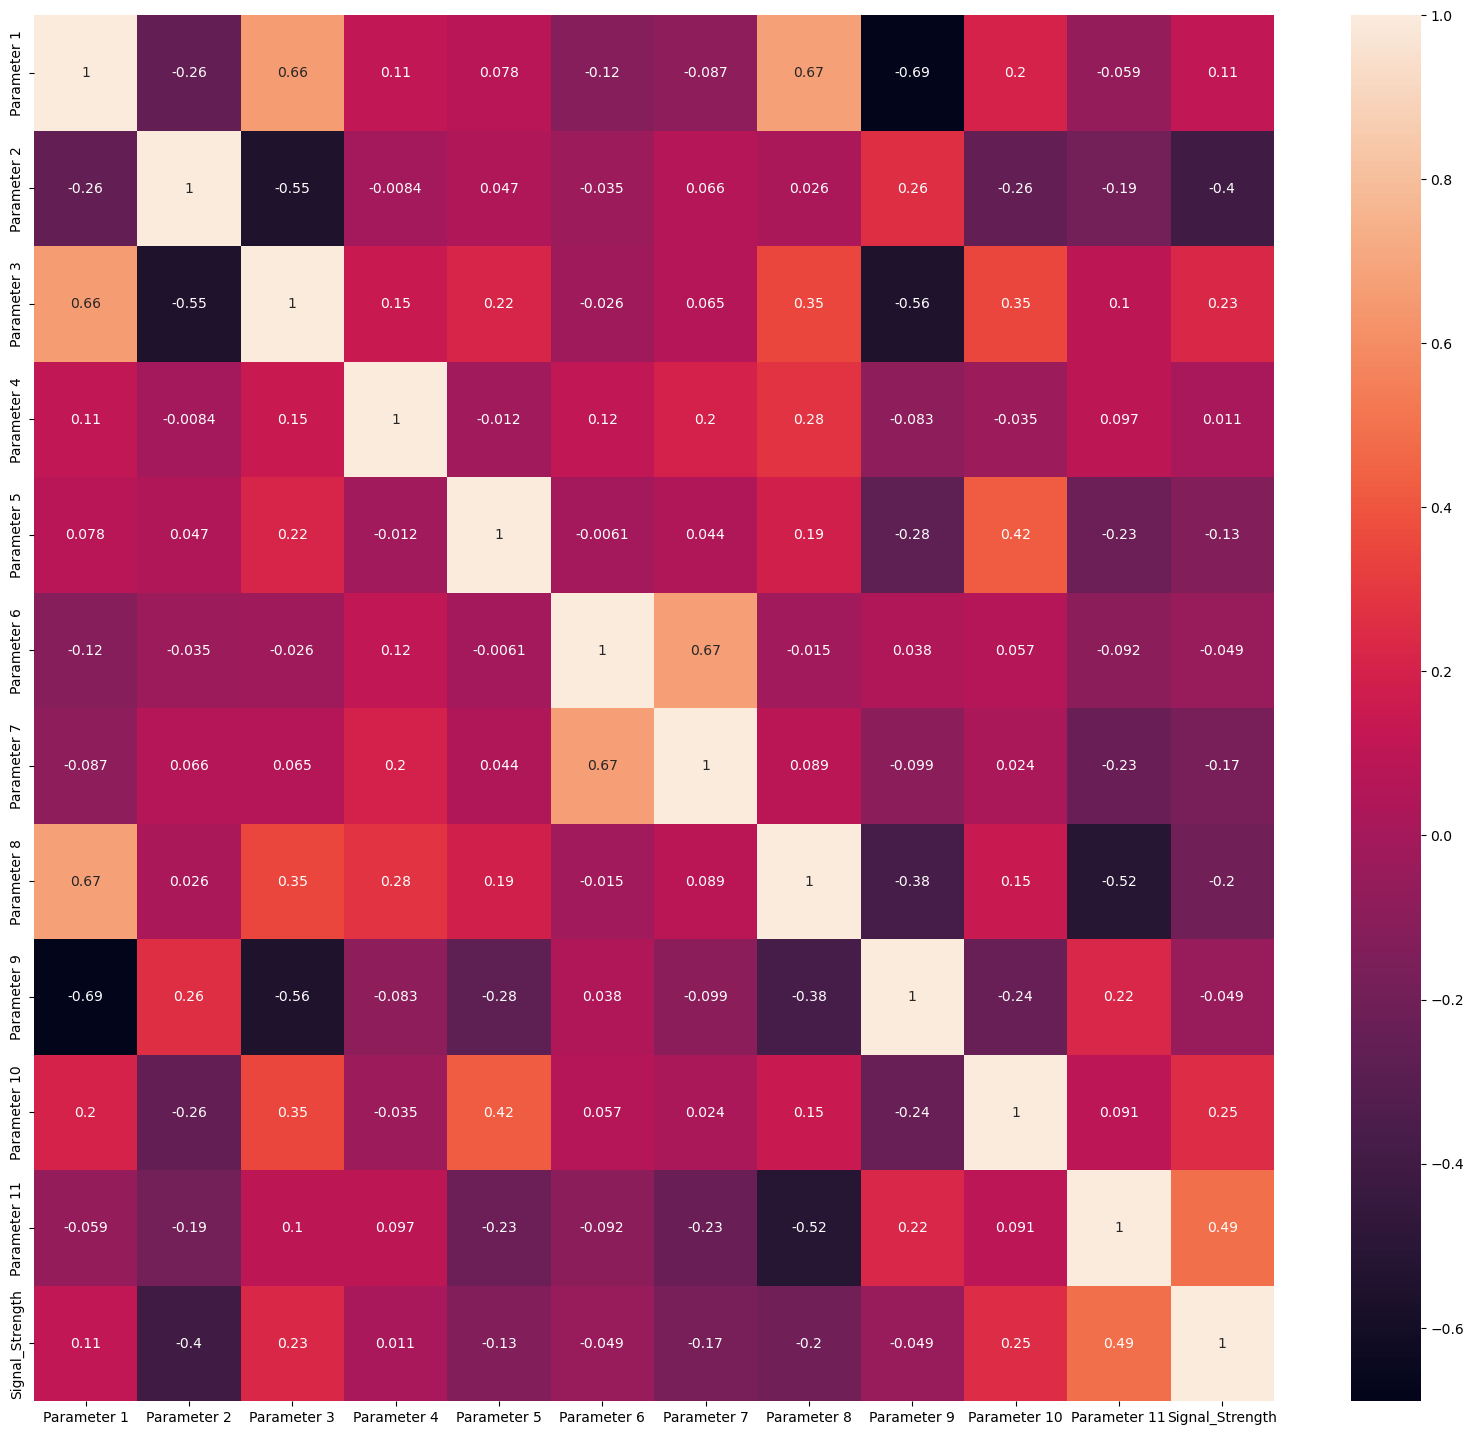

In [10]:
plt.figure(figsize=(20,18))
corr=signal.corr()
sns.heatmap(data=corr,annot=True)
plt.show()

There are 1599 rows and 12 columns
In 1599 there are 240 duplicated rows I decided to drop the rows as we are trying to check the Signal quality for different parameter. So for given parameter we can see the data are same, So i keep 1 row.
There is a negative correlation between Parameter 9 and 1
Parameter 3 and 9
parameter 11 and 8
Parameter 2 and Signal Strength
Parameter 8 and 9
So if parameter decreases other will increase and Vice verse


[0.07619787 0.09690205 0.07850552 0.07839616 0.0780528  0.07537761
 0.10545962 0.0818273  0.0763717  0.10119888 0.15171049]


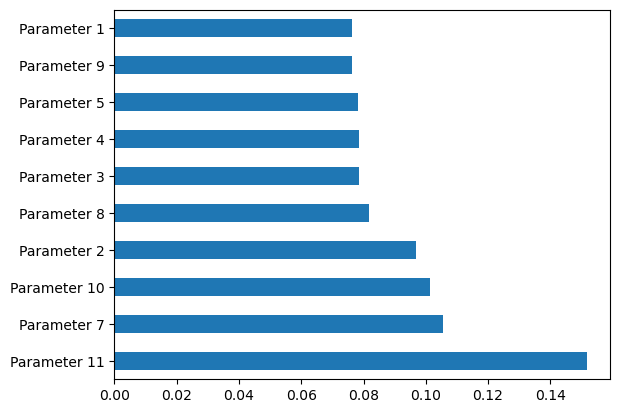

In [11]:
X=signal.drop('Signal_Strength',axis=1) 
Y=signal['Signal_Strength']                   

model = ExtraTreesClassifier()
model.fit(X,Y)

print(model.feature_importances_) 

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [12]:
X=signal.drop('Signal_Strength',axis=1)
Y=signal['Signal_Strength']               

X_Train,X_Test,Y_Train,Y_Test=train_test_split(X, Y, train_size=0.7, random_state=12)

In [13]:
X_Train_S = StandardScaler().fit_transform(X_Train) 
X_Test_S = StandardScaler().fit_transform(X_Test)  

In [14]:
from keras.utils import to_categorical

Y_Train = to_categorical(Y_Train)
Y_Test = to_categorical(Y_Test)

In [15]:
print(X_Train_S.shape)
print(X_Test_S.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(797, 11)
(342, 11)
(797, 9)
(342, 9)


In [16]:
NN_model_Classifier = Sequential()

# The Input Layer :
NN_model_Classifier.add(Dense(128, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Classifier.add(Dense(64, kernel_initializer='normal',activation='relu'))  # sigmoid, tanh

NN_model_Classifier.add(Dense(32, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))

NN_model_Classifier.add(Dense(16, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Classifier.add(Dense(9, kernel_initializer='normal',activation='softmax'))  # except softmax

# Compile the network :
NN_model_Classifier.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
NN_model_Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 9)                 1

In [17]:
EPOCH=400
Network_Classifier=NN_model_Classifier.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=EPOCH, batch_size=200)

Epoch 1/400
4/4 [==============================] - 2s 116ms/step - loss: 0.1975 - accuracy: 0.3588 - val_loss: 0.1974 - val_accuracy: 0.3860
Epoch 2/400
4/4 [==============================] - 0s 18ms/step - loss: 0.1973 - accuracy: 0.3890 - val_loss: 0.1972 - val_accuracy: 0.3860
Epoch 3/400
4/4 [==============================] - 0s 19ms/step - loss: 0.1972 - accuracy: 0.3890 - val_loss: 0.1971 - val_accuracy: 0.3860
Epoch 4/400
4/4 [==============================] - 0s 19ms/step - loss: 0.1970 - accuracy: 0.3890 - val_loss: 0.1968 - val_accuracy: 0.3860
Epoch 5/400
4/4 [==============================] - 0s 22ms/step - loss: 0.1967 - accuracy: 0.3890 - val_loss: 0.1965 - val_accuracy: 0.3860
Epoch 6/400
4/4 [==============================] - 0s 26ms/step - loss: 0.1963 - accuracy: 0.3890 - val_loss: 0.1960 - val_accuracy: 0.3860
Epoch 7/400
4/4 [==============================] - 0s 25ms/step - loss: 0.1956 - accuracy: 0.3890 - val_loss: 0.1951 - val_accuracy: 0.3860
Epoch 8/400
4/4 [==

4/4 [==============================] - 0s 23ms/step - loss: 0.0887 - accuracy: 0.6098 - val_loss: 0.1018 - val_accuracy: 0.5409
Epoch 60/400
4/4 [==============================] - 0s 24ms/step - loss: 0.0886 - accuracy: 0.6073 - val_loss: 0.1012 - val_accuracy: 0.5409
Epoch 61/400
4/4 [==============================] - 0s 20ms/step - loss: 0.0884 - accuracy: 0.6098 - val_loss: 0.1009 - val_accuracy: 0.5468
Epoch 62/400
4/4 [==============================] - 0s 24ms/step - loss: 0.0880 - accuracy: 0.6085 - val_loss: 0.1015 - val_accuracy: 0.5439
Epoch 63/400
4/4 [==============================] - 0s 20ms/step - loss: 0.0880 - accuracy: 0.6085 - val_loss: 0.1013 - val_accuracy: 0.5439
Epoch 64/400
4/4 [==============================] - 0s 23ms/step - loss: 0.0875 - accuracy: 0.6123 - val_loss: 0.1006 - val_accuracy: 0.5497
Epoch 65/400
4/4 [==============================] - 0s 22ms/step - loss: 0.0875 - accuracy: 0.6148 - val_loss: 0.1007 - val_accuracy: 0.5497
Epoch 66/400
4/4 [========

4/4 [==============================] - 0s 20ms/step - loss: 0.0810 - accuracy: 0.6374 - val_loss: 0.0995 - val_accuracy: 0.5556
Epoch 118/400
4/4 [==============================] - 0s 26ms/step - loss: 0.0809 - accuracy: 0.6374 - val_loss: 0.0994 - val_accuracy: 0.5556
Epoch 119/400
4/4 [==============================] - 0s 20ms/step - loss: 0.0809 - accuracy: 0.6374 - val_loss: 0.0994 - val_accuracy: 0.5556
Epoch 120/400
4/4 [==============================] - 0s 23ms/step - loss: 0.0808 - accuracy: 0.6386 - val_loss: 0.0995 - val_accuracy: 0.5556
Epoch 121/400
4/4 [==============================] - 0s 23ms/step - loss: 0.0807 - accuracy: 0.6386 - val_loss: 0.0995 - val_accuracy: 0.5526
Epoch 122/400
4/4 [==============================] - 0s 27ms/step - loss: 0.0807 - accuracy: 0.6386 - val_loss: 0.0995 - val_accuracy: 0.5556
Epoch 123/400
4/4 [==============================] - 0s 24ms/step - loss: 0.0806 - accuracy: 0.6386 - val_loss: 0.0995 - val_accuracy: 0.5556
Epoch 124/400
4/4 [=

Epoch 175/400
4/4 [==============================] - 0s 24ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0995 - val_accuracy: 0.5526
Epoch 176/400
4/4 [==============================] - 0s 24ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0995 - val_accuracy: 0.5556
Epoch 177/400
4/4 [==============================] - 0s 23ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0995 - val_accuracy: 0.5526
Epoch 178/400
4/4 [==============================] - 0s 28ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0995 - val_accuracy: 0.5526
Epoch 179/400
4/4 [==============================] - 0s 22ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0995 - val_accuracy: 0.5526
Epoch 180/400
4/4 [==============================] - 0s 21ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0995 - val_accuracy: 0.5526
Epoch 181/400
4/4 [==============================] - 0s 23ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0995 - val_accuracy: 0.5526
Epoch 

Epoch 233/400
4/4 [==============================] - 0s 26ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0994 - val_accuracy: 0.5526
Epoch 234/400
4/4 [==============================] - 0s 23ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0994 - val_accuracy: 0.5526
Epoch 235/400
4/4 [==============================] - 0s 27ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0994 - val_accuracy: 0.5526
Epoch 236/400
4/4 [==============================] - 0s 22ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0994 - val_accuracy: 0.5526
Epoch 237/400
4/4 [==============================] - 0s 19ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0994 - val_accuracy: 0.5526
Epoch 238/400
4/4 [==============================] - 0s 26ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0994 - val_accuracy: 0.5526
Epoch 239/400
4/4 [==============================] - 0s 24ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0994 - val_accuracy: 0.5526
Epoch 

Epoch 291/400
4/4 [==============================] - 0s 21ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0994 - val_accuracy: 0.5556
Epoch 292/400
4/4 [==============================] - 0s 20ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0994 - val_accuracy: 0.5556
Epoch 293/400
4/4 [==============================] - 0s 23ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0994 - val_accuracy: 0.5556
Epoch 294/400
4/4 [==============================] - 0s 21ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0994 - val_accuracy: 0.5556
Epoch 295/400
4/4 [==============================] - 0s 23ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0994 - val_accuracy: 0.5556
Epoch 296/400
4/4 [==============================] - 0s 25ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0994 - val_accuracy: 0.5556
Epoch 297/400
4/4 [==============================] - 0s 19ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0994 - val_accuracy: 0.5556
Epoch 

Epoch 349/400
4/4 [==============================] - 0s 19ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0994 - val_accuracy: 0.5556
Epoch 350/400
4/4 [==============================] - 0s 22ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0994 - val_accuracy: 0.5556
Epoch 351/400
4/4 [==============================] - 0s 21ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0994 - val_accuracy: 0.5556
Epoch 352/400
4/4 [==============================] - 0s 24ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0994 - val_accuracy: 0.5556
Epoch 353/400
4/4 [==============================] - 0s 19ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0994 - val_accuracy: 0.5556
Epoch 354/400
4/4 [==============================] - 0s 22ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0994 - val_accuracy: 0.5556
Epoch 355/400
4/4 [==============================] - 0s 20ms/step - loss: 0.0798 - accuracy: 0.6412 - val_loss: 0.0994 - val_accuracy: 0.5556
Epoch 

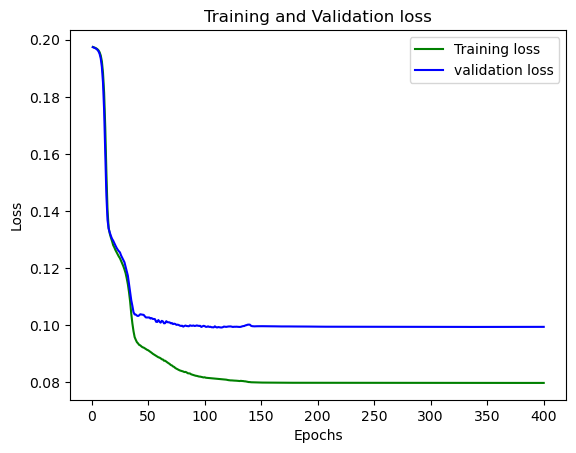

In [18]:
loss_train = Network_Classifier.history['loss']
loss_val = Network_Classifier.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

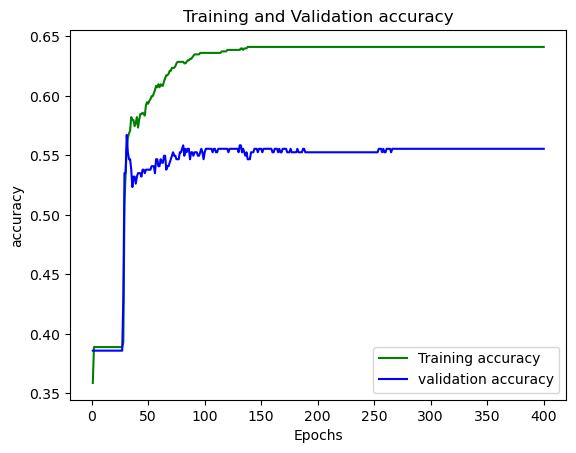

In [19]:
Acc_train = Network_Classifier.history['accuracy']
Acc_val = Network_Classifier.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [20]:
from keras.models import model_from_json
import os

Classifier_model_json = NN_model_Classifier.to_json()
with open("Classifier_model.json", "w") as json_file:
    json_file.write(Classifier_model_json)

NN_model_Classifier.save_weights("Classifier_model.h5")
print("Saved model to disk")


json_file = open('Classifier_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("Classifier_model.h5")
print("Loaded model from disk")

loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_Test_S,Y_Test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
accuracy: 55.56%


From the plot of the loss, you can see that the model has comparable performance on both train and
validation datasets (labeled test). If these parallel plots start to depart consistently, 
it might be a sign to stop training at an earlier epoch.

Also we notice that after a certain point the model begins to overfit on our dataset as is clear from the plots above where the validation loss begins to decrease after certain point and validation accuracy begins to increase.

Thus,Accuracy of model is 56% of accuracy we are able to distinguish between the different Parameters.